# Part 02 - Calculating $\pi$

We often take constants such as $\pi$ and functions such as $\sin$ and $\log$ for granted. We have them in our calculators and computers, but if we were stuck in the wilderness, trying to triangulate our position or solve a tricky math problem to impress the natives, could we recreate them with just basic multiplication, addition, and subtraction?

Here we're going to try to calculate $\pi$. We assume we can create random numbers (maybe by dropping stones at random on a grid, or rolling a dice, or flipping a coin), and multiply, but that's it!

We need some simple system that contains $\pi$, so consider a circle of radius 1 centered within a square of length 2.

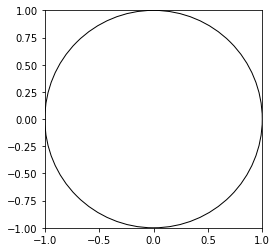

In [1]:
import pylab #Get our plotting library loaded
axis = pylab.gca() #Get the Current Axis (GCA) of the current figure
axis.add_artist(pylab.Circle((0,0),1, fill=False)) #Draw a circle at 0,0 with radius 1
axis.set_aspect('equal', 'box') # Give us a nice square plot
pylab.xlim(-1,1) # set the limits of the plot to exactly around the circle
pylab.ylim(-1,1) # ...
pylab.show()

If we generate two random numbers between [-1,+1], and use them as coordinates on the graph above, what is the probability it will land in the circle?

This is just the ratio of the area of the circle, $4\,\pi\,r^2/3$, to the area of the square, $2^2=4$,
$$P = \frac{\pi}{3}$$

How can we work out if a point is inside the circle or not? Well, the equation of a circle gives us a hint:
$$R^2 = x^2+y^2$$
For the point to be inside the circle we must have:
$$x^2+y^2 < R^2$$

So our algorithm is clear:

1. Generate a pair of random numbers, $x\in[-1,+1]$ and $y\in[-1,+1]$.
2. if $x^2+y^2 < R^2$, then increment our counter for how many landed in, $N_{in}$.
3. Always increment the number of tries $N_{tru}$.
4. Calculate the new estimate of $\pi$ as $3*N_{in}/N_{try}$.
5. If the maximum number of samples has been reached, then stop, otherwise goto 1.

Try implementing this yourself below!

## Extra credit

1. Do we need to generate pairs in the range $[-1,1]$. Is there any symmetry we can use to generate them in a smaller range?
2. Plot the convergence of the estimate towards $\pi$ every 1k samples, how fast is it converging?
3. Restart the calculations repeatedly to get the standard deviation in the value of $\pi$ after every 1k samples. How fast does the standard deviation reduce with the sample count?
4. Do we need random numbers? Adapt the code to use a regular grid and compare.
5. This is actually a Monte Carlo integration of the following integral $$ \frac{\pi}{3}=\frac{\iint_{-1}^{+1} \Theta\left(1-x^2-y^2\right) {\rm d}x\,{\rm d}y}{\iint_{-1}^{+1}{\rm d}x\,{\rm d}y}$$ where the bottom integral is just the area of the square (4). This is an example of how Monte Carlo integration using random numbers can solve quite difficult integrals, and Monte Carlo will be covered later in the main course.

# Extra Extra credit

Try generating random numbers between 0 to 1 using a coin!

We will try to generate random numbers between $(0,1)$ by starting at 0. Flip a coin, if heads then add $1/2$. If tails then add zero. Repeat but add $1/4$, then $1/8$, then $1/16$ until you have the precision you need.

Lets take a look at that

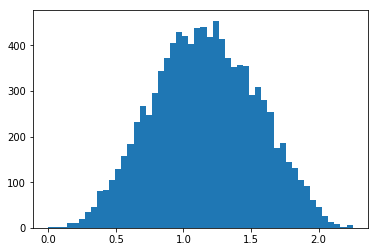

In [15]:
import numpy.random

def flip_a_coin():
    return numpy.random.randint(0,2) == 1

def random_01():
    value = 0
    for divisor in range(2, 16):
        if flip_a_coin() == True:
            value += 1.0 / divisor
    return value

random_nums = []
for count in range(0, 10000):
    random_nums.append(random_01())
    
import pylab
pylab.hist(random_nums, 50)
pylab.show()